In [43]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import sys
sys.path.append("..") 
%matplotlib inline


#读取数据
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
combined_df = pd.concat([train_data,test_data],axis=0)
#头5条数据
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#训练数据大小
train_data.shape

(1460, 81)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#训练数据类型统计
train_dtype = train_data.dtypes
train_dtype.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
#训练数据信息
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#训练数据中的空值排序前20个
train_data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

<AxesSubplot:>

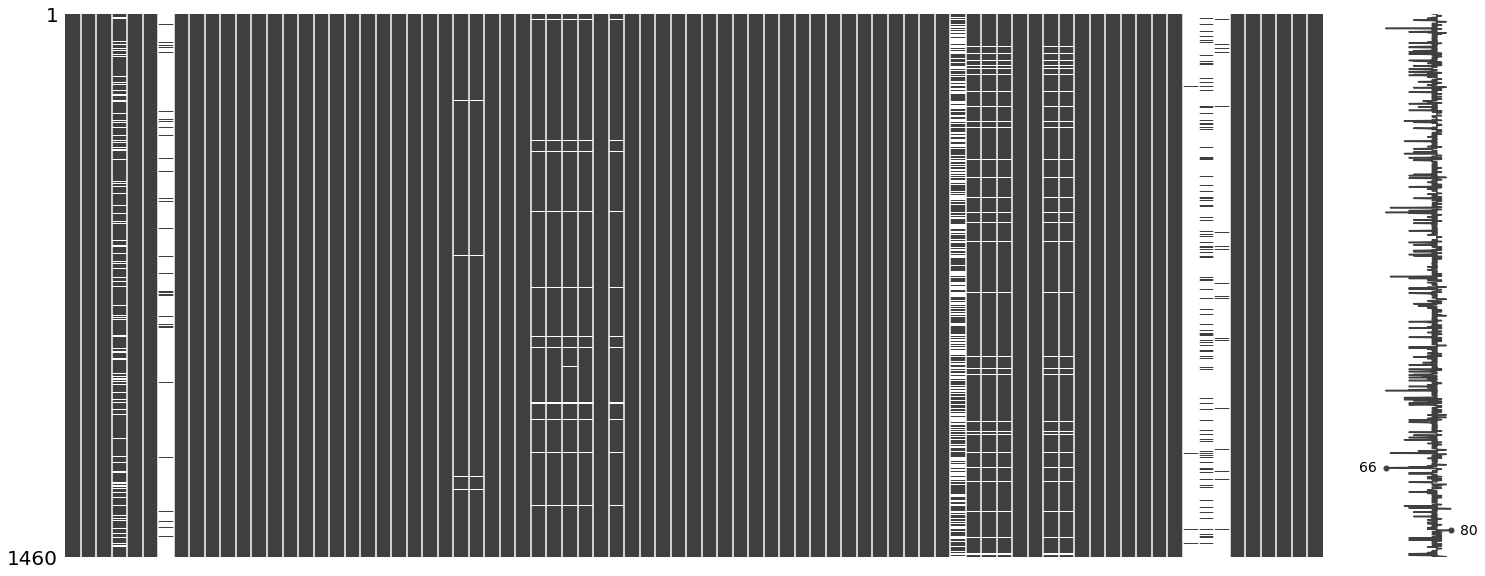

In [8]:
#可视化缺省值
msno.matrix(train_data)

<AxesSubplot:>

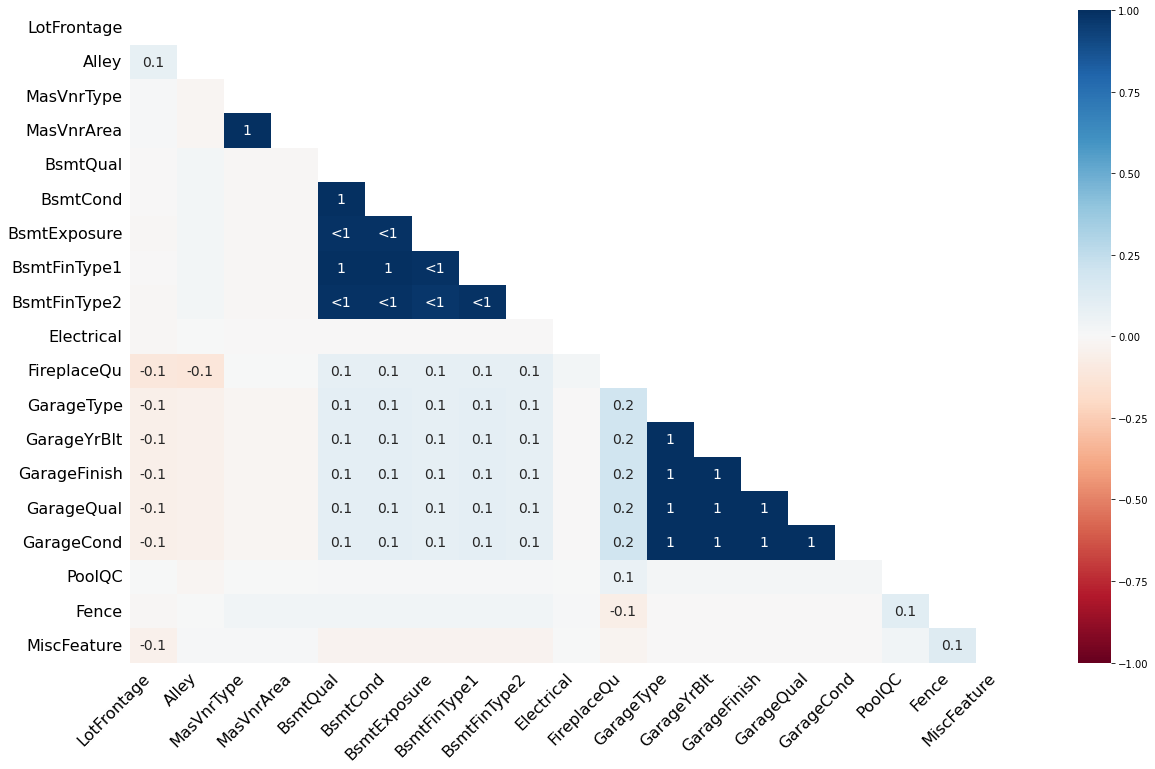

In [34]:
# 使用misingno查看缺失数据之间的相关性：表征一个变量的存在和不存在如何强烈地影响另一个的存在
# （比如说如果rate1和rate2的热度值是1,那么rate11缺失，rate2也必然缺失，两者在缺失性之间是直接相关的）
msno.heatmap(train_data)

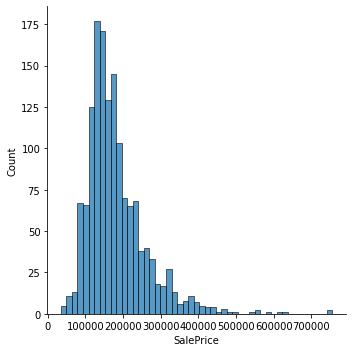

In [12]:
# 查看训练数据对应价格的分布
sns.displot(train_data['SalePrice'])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

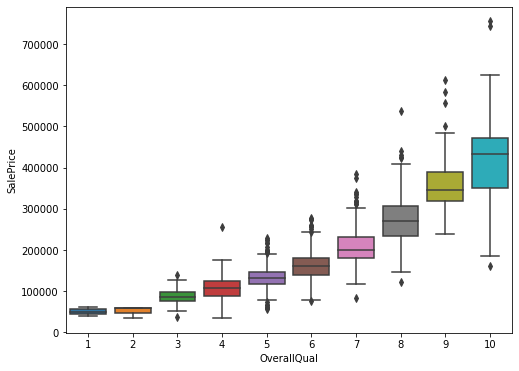

In [13]:
# 可以看到整体评分越高其价格是越高的
overallQual_SalePrice = pd.concat([train_data['SalePrice'],train_data['OverallQual']],axis=1)
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual',y='SalePrice',data=overallQual_SalePrice)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

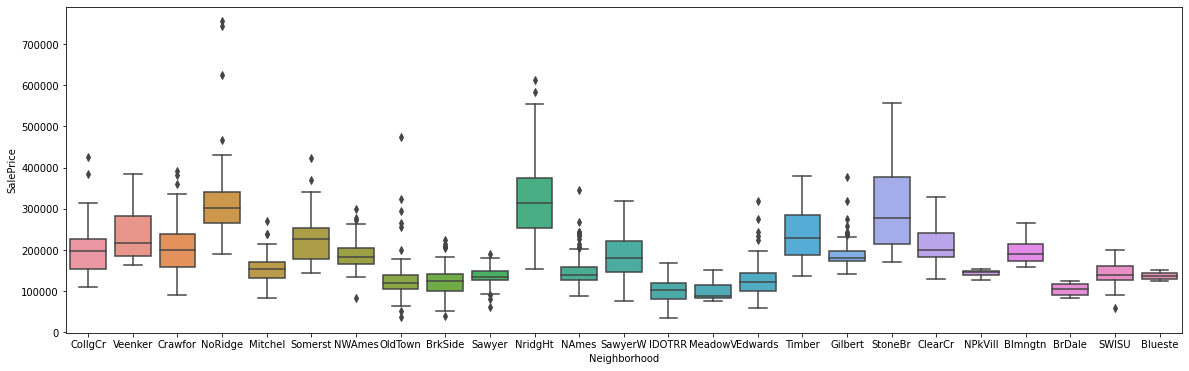

In [14]:
# 用箱状图查看一下离散非数值型数据的分布
# 可以看到如果neighorhood是在stoneBr和NridgHt附近的话，价格会较高
Neighborhood_SalePrice = pd.concat([train_data['SalePrice'],train_data['Neighborhood']],axis=1)
plt.figure(figsize=(20,6))
sns.boxplot(x='Neighborhood',y='SalePrice',data=Neighborhood_SalePrice)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

<Figure size 576x432 with 0 Axes>

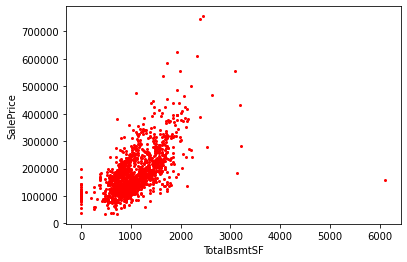

In [15]:
# 绘制和价格相关的特征的散点图
TotalBsmtSF_SalePrice = pd.concat([train_data['SalePrice'],train_data['TotalBsmtSF']],axis=1)
plt.figure(figsize=(8,6))
TotalBsmtSF_SalePrice.plot.scatter(x='TotalBsmtSF',y='SalePrice',s=4,c='red')

In [35]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
# 查看测试数据中的数据类型统计
test_dtype = test_data.dtypes
test_dtype.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [17]:
#测试数据集的数据大小
test_data.shape

(1459, 80)

In [18]:
#测试数据集缺省值前20
test_data.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

<AxesSubplot:>

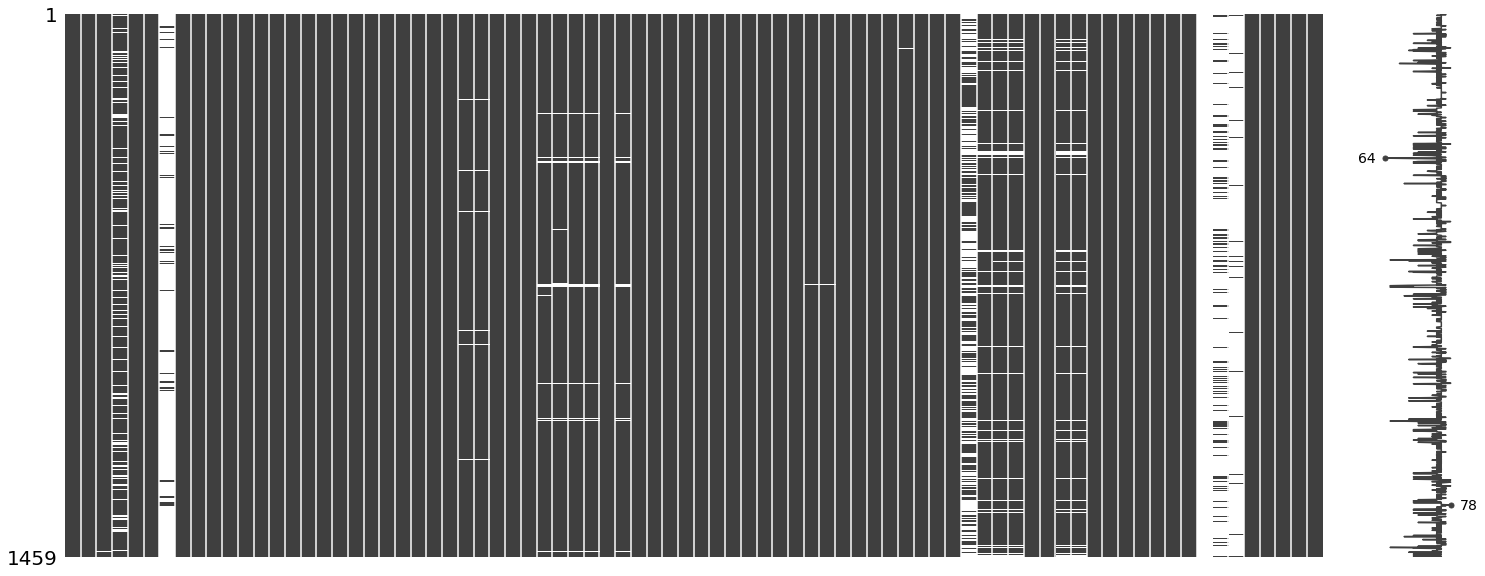

In [19]:
#缺失数据可视化
msno.matrix(test_data)

<AxesSubplot:>

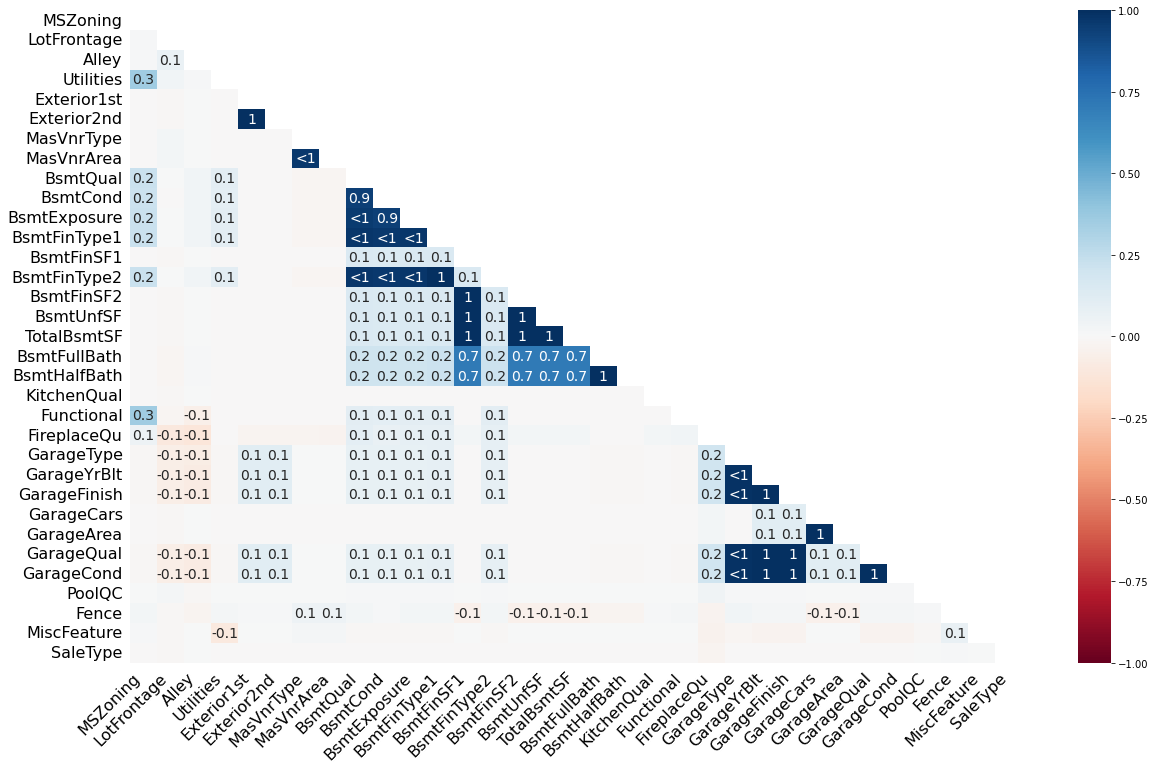

In [20]:
# 缺省值对比分析，可看出测试数据缺失比训练数据更严重
msno.heatmap(test_data)

In [21]:
# 将标签值SalePrice去除，然后使用pandas的compare将两个dataframe进行比较
train_dtype = train_dtype.drop('SalePrice')
train_dtype.compare(test_dtype)

,self,other
BsmtFinSF1,int64,float64
BsmtFinSF2,int64,float64
BsmtUnfSF,int64,float64
TotalBsmtSF,int64,float64
BsmtFullBath,int64,float64
BsmtHalfBath,int64,float64
GarageCars,int64,float64
GarageArea,int64,float64


In [22]:
#缺失数据对比
null_train = train_data.isnull().sum()
null_test = test_data.isnull().sum()
null_train = null_train.drop('SalePrice')
null_comp_df = null_train.compare(null_test).sort_values(['self'],ascending=[False])
null_comp_df

,self,other
PoolQC,1453.0,1456.0
MiscFeature,1406.0,1408.0
Alley,1369.0,1352.0
Fence,1179.0,1169.0
FireplaceQu,690.0,730.0
LotFrontage,259.0,227.0
GarageType,81.0,76.0
GarageCond,81.0,78.0
GarageYrBlt,81.0,78.0
GarageFinish,81.0,78.0


In [26]:
numerical_features = [col for col in train_data.columns if train_data[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(train_data[col].unique()) < 25 and col not in ['Id']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['Id']]
categorical_features = [col for col in train_data.columns if train_data[col].dtype == 'O']

print("Total Number of Numerical Columns : ",len(numerical_features))
print("Number of discrete features : ",len(discrete_features))
print("No of continuous features are : ", len(continuous_features))
print("Number of non-numeric features : ",len(categorical_features))

Total Number of Numerical Columns :  38
Number of discrete features :  18
No of continuous features are :  19
Number of non-numeric features :  43


In [44]:
#打标签标识训练数据和测试数据
combined_df['Label'] = "test"
combined_df['Label'][:1460] = "Train"

ValueError: cannot reindex from a duplicate axis

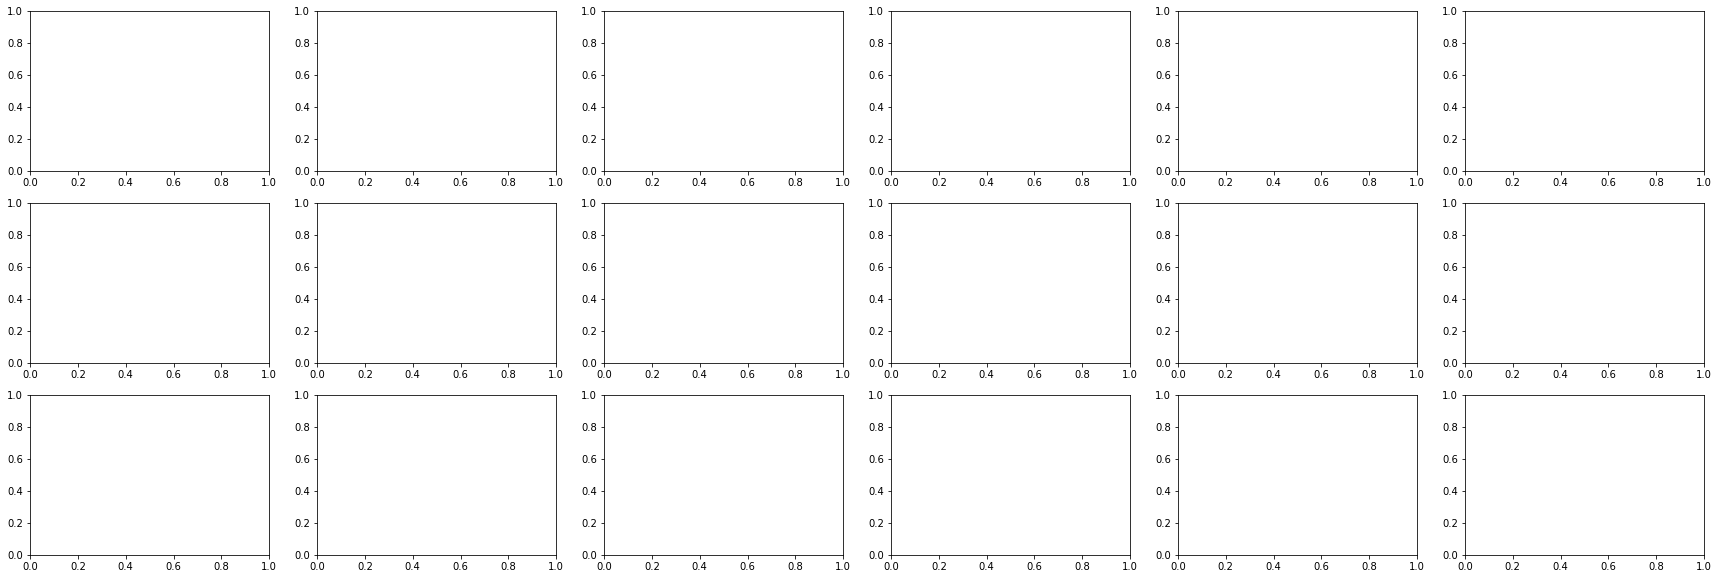

In [41]:
# 对比离散数据
"""
sns.hitplot(data,x,y,hue,ax)
data:pandas.Dataframe,numpy.ndarray,mapping,or sequence：input data
x,y : 指定x,y轴的变量
hue：确定绘图颜色的变量
ax:预先定义的绘图区域
"""
f,axes = plt.subplots(3,6,figsize=(30,10),sharex=False)
for i,feature in enumerate(discrete_features):
    sns.histplot(data=combined_df,x=feature,hue='Label',ax=axes[i%3,i//3])